# § Chapter 11 Time Series

## §11.1 Date and Time Data Types and Tools
-	Converting Between String and Datetime

## §11.2 Time Series Basics
-	Indexing, Selection, Subsetting
-	Time Series with Duplicate Indices

## §11.3 Date Ranges, Frequencies, and Shifting
-	Generating Date Ranges
-	Frequencies and Date Offsets
-	Shifting (Leading and Lagging) Data

## §11.4 Time Zone Handling
-	Time Zone Localization and Conversion
-	Operations with Time Zone−Aware Timestamp Objects
-	Operations Between Different Time Zones

## §11.5 Periods and Period Arithmetic
-	Period Frequency Conversion
-	Quarterly Period Frequencies
-	Converting Timestamps to Periods (and Back)
-   Creating a PeriodIndex from Arrays

## §11.6 Resampling and Frequency Conversion
-	Downsampling
-	Upsampling and Interpolation
-	Resampling with Periods

## §11.7 Moving Window Functions
-	Exponentially Weighted Functions
-	Binary Moving Window Functions
-	User-Defined Moving Window Functions

In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows #display max raw in dataframe
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True) #precision:控制打印精度(小數位數), suppress 是否要改以科學記號顯示

## §11.1 Date and Time Data Types and Tools
-	Converting Between String and Datetime

In [2]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2021, 12, 13, 9, 22, 20, 773538)

In [3]:
now.year, now.month, now.day

(2021, 12, 13)

In [4]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [7]:
56700/60/60

15.75

In [8]:
delta.days

926

In [9]:
delta.seconds

56700

In [10]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [11]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### §11.1.1 Converting Between String and Datetime

In [12]:
stamp = datetime(2011, 1, 3)
stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [13]:
str(stamp)

'2011-01-03 00:00:00'

In [14]:
stamp.strftime('%Y-%m-%d') # time to string. %H %M %S

'2011-01-03'

In [15]:
stamp.strftime('%Y/%m/%d') # time to string. %H %M %S

'2011/01/03'

In [16]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d') # string to time

datetime.datetime(2011, 1, 3, 0, 0)

In [17]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [18]:
# datetime.strptime?

In [20]:
# parser.parse can parser common date formats
# 這個就靈活了
from dateutil.parser import parse 
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [21]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [22]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [23]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [24]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [25]:
idx[0]

Timestamp('2011-07-06 12:00:00')

In [26]:
idx[2] #Not a Time

NaT

In [27]:
pd.isnull(idx)

array([False, False,  True])

## §11.2 Time Series Basics
-	Indexing, Selection, Subsetting
-	Time Series with Duplicate Indices

In [28]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [29]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [30]:
ts[::2]

2011-01-02   -0.204708
2011-01-07   -0.519439
2011-01-10    1.965781
dtype: float64

In [31]:
ts + ts[::2]

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

In [32]:
#pandas stores timestamps using NumPy’s datetime64 data type at the nanosecond resolution
# 1 nanosecond = 1.0 × 10-9 seconds

ts.index.dtype

dtype('<M8[ns]')

In [33]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### §11.2.1 Indexing, Selection, Subsetting

In [34]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [35]:
stamp = ts.index[2]
ts[stamp]

-0.5194387150567381

In [36]:
ts['2011-01-10']

1.9657805725027142

In [37]:
ts['1/10/2011']

1.9657805725027142

In [38]:
ts['20110110']

1.9657805725027142

In [39]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    0.092908
2000-01-02    0.281746
2000-01-03    0.769023
2000-01-04    1.246435
2000-01-05    1.007189
                ...   
2002-09-22    0.930944
2002-09-23   -0.811676
2002-09-24   -1.830156
2002-09-25   -0.138730
2002-09-26    0.334088
Freq: D, Length: 1000, dtype: float64

In [40]:
longer_ts['2001']

2001-01-01    1.599534
2001-01-02    0.474071
2001-01-03    0.151326
2001-01-04   -0.542173
2001-01-05   -0.475496
                ...   
2001-12-27    0.057874
2001-12-28   -0.433739
2001-12-29    0.092698
2001-12-30   -1.397820
2001-12-31    1.457823
Freq: D, Length: 365, dtype: float64

In [41]:
longer_ts['2001-05']

2001-05-01   -0.622547
2001-05-02    0.936289
2001-05-03    0.750018
2001-05-04   -0.056715
2001-05-05    2.300675
                ...   
2001-05-27    0.235477
2001-05-28    0.111835
2001-05-29   -1.251504
2001-05-30   -2.949343
2001-05-31    0.634634
Freq: D, Length: 31, dtype: float64

In [42]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [43]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [44]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [45]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [46]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

In [47]:
ts[:'1/9/2011']

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

In [63]:
dates = pd.date_range('1/1/2001', periods=100, freq='W-MON') # freq='W-WED' -> weekly frequency (Wednesdays)
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df

,Colorado,Texas,New York,Ohio
2001-01-01,0.597205,0.039901,-0.757430,1.698482
2001-01-08,-0.434694,0.516461,-0.153220,-0.452038
2001-01-15,0.777409,-0.163869,-0.776469,-1.229509
2001-01-22,0.422435,1.412942,0.917802,-0.183745
2001-01-29,0.589207,1.024586,0.874961,0.370509
...,...,...,...,...
2002-10-28,-0.002199,1.022771,-0.919294,0.773630
2002-11-04,0.841223,-0.708950,-0.988952,0.953576
2002-11-11,1.890087,-0.289879,-0.738711,-0.572103
2002-11-18,-1.120953,0.666270,-0.641914,0.878898


In [57]:
dates = pd.date_range('2/24/2022', periods=16, freq='W-WED') 

In [58]:
dates

DatetimeIndex(['2022-03-02', '2022-03-09', '2022-03-16', '2022-03-23',
               '2022-03-30', '2022-04-06', '2022-04-13', '2022-04-20',
               '2022-04-27', '2022-05-04', '2022-05-11', '2022-05-18',
               '2022-05-25', '2022-06-01', '2022-06-08', '2022-06-15'],
              dtype='datetime64[ns]', freq='W-WED')

In [59]:
dates2 = pd.date_range('2/24/2022', periods=16, freq='W-FRI') 

In [60]:
dates2

DatetimeIndex(['2022-02-25', '2022-03-04', '2022-03-11', '2022-03-18',
               '2022-03-25', '2022-04-01', '2022-04-08', '2022-04-15',
               '2022-04-22', '2022-04-29', '2022-05-06', '2022-05-13',
               '2022-05-20', '2022-05-27', '2022-06-03', '2022-06-10'],
              dtype='datetime64[ns]', freq='W-FRI')

In [ ]:
#?? 我怎麼把這一週內兩個不同日的日期串在一起？

In [64]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-07,-0.970619,-0.389689,-0.534781,0.227895
2001-05-14,-0.383449,0.246340,-2.611124,-1.010660
2001-05-21,-0.127276,0.312310,1.178483,1.063616
2001-05-28,1.229272,-1.077152,-1.578347,1.619315


In [65]:
long_df['5-2001']

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2001-05-07,-0.970619,-0.389689,-0.534781,0.227895
2001-05-14,-0.383449,0.246340,-2.611124,-1.010660
2001-05-21,-0.127276,0.312310,1.178483,1.063616
2001-05-28,1.229272,-1.077152,-1.578347,1.619315


### §11.2.2 Time Series with Duplicate Indices

In [66]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [67]:
# We can tell that the index is not unique by checking its is_unique property
dup_ts.index.is_unique

False

In [68]:
dup_ts['1/3/2000']  # not duplicated

4

In [69]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [70]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [71]:
# 把 pd.DatetimeIndex 視為 level=0 index
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [72]:
grouped.groups

{2000-01-01 00:00:00: [2000-01-01 00:00:00], 2000-01-02 00:00:00: [2000-01-02 00:00:00, 2000-01-02 00:00:00, 2000-01-02 00:00:00], 2000-01-03 00:00:00: [2000-01-03 00:00:00]}

In [ ]:
# grouped = dup_ts.groupby()
# grouped.mean()

In [73]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## §11.3 Date Ranges, Frequencies, and Shifting
-	Generating Date Ranges
-	Frequencies and Date Offsets
-	Shifting (Leading and Lagging) Data

In [75]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [76]:
type(ts)

pandas.core.series.Series

### Offset aliases: 
https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases 

In [77]:
resampler = ts.resample('D') #'D' is interpreted as daily frequency.
# 即使中間有欠項，但會補 0
resampler.sum() # 只是為了顯示出來

2011-01-02   -0.204708
2011-01-03    0.000000
2011-01-04    0.000000
2011-01-05    0.478943
2011-01-06    0.000000
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-09    0.000000
2011-01-10    1.965781
2011-01-11    0.000000
2011-01-12    1.393406
Freq: D, dtype: float64

In [78]:
resampler

In [79]:
type(resampler)

pandas.core.resample.DatetimeIndexResampler

In [80]:
sum(ts.values)

2.558253064644312

In [81]:
resampler = ts.resample('M') #'M' is interpreted as month frequency.
resampler.sum()

2011-01-31    2.558253
Freq: M, dtype: float64

In [82]:
# type(resampler)

### §11.3.1 Generating Date Ranges

In [83]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [84]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [85]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [87]:
pd.date_range('2021-09-01', '2021-12-31', freq='BM')  # freq='BM' -> last business day of each month

DatetimeIndex(['2021-09-30', '2021-10-29', '2021-11-30', '2021-12-31'], dtype='datetime64[ns]', freq='BM')

In [88]:
type(pd.date_range('2000-01-01', '2000-12-01', freq='BM'))

pandas.core.indexes.datetimes.DatetimeIndex

In [89]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [90]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True) # normalize timestamps to midnight

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [91]:
pd.Series(pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True))

0   2012-05-02
1   2012-05-03
2   2012-05-04
3   2012-05-05
4   2012-05-06
dtype: datetime64[ns]

In [92]:
pd.date_range('2022-02-04',  periods=16, freq="W-WED")

DatetimeIndex(['2022-02-09', '2022-02-16', '2022-02-23', '2022-03-02',
               '2022-03-09', '2022-03-16', '2022-03-23', '2022-03-30',
               '2022-04-06', '2022-04-13', '2022-04-20', '2022-04-27',
               '2022-05-04', '2022-05-11', '2022-05-18', '2022-05-25'],
              dtype='datetime64[ns]', freq='W-WED')

In [93]:
# 每個月的第一個星期三
pd.date_range('2022-02-04',  periods=16, freq="WOM-1WED")

DatetimeIndex(['2022-03-02', '2022-04-06', '2022-05-04', '2022-06-01',
               '2022-07-06', '2022-08-03', '2022-09-07', '2022-10-05',
               '2022-11-02', '2022-12-07', '2023-01-04', '2023-02-01',
               '2023-03-01', '2023-04-05', '2023-05-03', '2023-06-07'],
              dtype='datetime64[ns]', freq='WOM-1WED')

In [94]:
Wed = pd.Series(pd.date_range('2022-02-04',  periods=16, freq="W-WED"))

In [95]:
Fri = pd.Series(pd.date_range('2022-02-04',  periods=16, freq="W-FRI"))

In [96]:
Wed.append(Fri).sort_values()

0    2022-02-04
0    2022-02-09
1    2022-02-11
1    2022-02-16
2    2022-02-18
        ...    
13   2022-05-11
14   2022-05-13
14   2022-05-18
15   2022-05-20
15   2022-05-25
Length: 32, dtype: datetime64[ns]

### §11.3.2 Frequencies and Date Offsets

In [97]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [98]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [99]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq=four_hours)

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [100]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [101]:
Hour(2) + Minute(30)

<150 * Minutes>

In [102]:
pd.date_range('2000-01-01', periods=10, freq=Hour(2) + Minute(30))

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 02:30:00',
               '2000-01-01 05:00:00', '2000-01-01 07:30:00',
               '2000-01-01 10:00:00', '2000-01-01 12:30:00',
               '2000-01-01 15:00:00', '2000-01-01 17:30:00',
               '2000-01-01 20:00:00', '2000-01-01 22:30:00'],
              dtype='datetime64[ns]', freq='150T')

In [104]:
pd.date_range('2000-01-01', periods=10, freq='2h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 02:30:00',
               '2000-01-01 05:00:00', '2000-01-01 07:30:00',
               '2000-01-01 10:00:00', '2000-01-01 12:30:00',
               '2000-01-01 15:00:00', '2000-01-01 17:30:00',
               '2000-01-01 20:00:00', '2000-01-01 22:30:00'],
              dtype='datetime64[ns]', freq='150T')

#### Week of month dates

In [106]:
# 每個月的第三個量期五
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI') # WOM -> WeekOfMonth , 3FRI -> third Friday of each month
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

In [107]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### §11.3.3 Shifting (Leading 往前 and Lagging 延後) Data

In [108]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -1.337833
2000-02-29   -0.834688
2000-03-31    1.044103
2000-04-30    0.639737
Freq: M, dtype: float64

In [109]:
# value
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -1.337833
2000-04-30   -0.834688
Freq: M, dtype: float64

In [110]:
ts.shift(-2)

2000-01-31    1.044103
2000-02-29    0.639737
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

### computing percent changes in a time series
```python
ts / ts.shift(1) - 1
```

In [111]:
ts

2000-01-31   -1.337833
2000-02-29   -0.834688
2000-03-31    1.044103
2000-04-30    0.639737
Freq: M, dtype: float64

In [112]:
ts.shift(1)

2000-01-31         NaN
2000-02-29   -1.337833
2000-03-31   -0.834688
2000-04-30    1.044103
Freq: M, dtype: float64

In [113]:
ts / ts.shift(1) - 1 

2000-01-31         NaN
2000-02-29   -0.376089
2000-03-31   -2.250890
2000-04-30   -0.387286
Freq: M, dtype: float64

In [114]:
# 其實另外還有一個現成的指令
ts.pct_change()

2000-01-31         NaN
2000-02-29   -0.376089
2000-03-31   -2.250890
2000-04-30   -0.387286
Freq: M, dtype: float64

In [115]:
ts

2000-01-31   -1.337833
2000-02-29   -0.834688
2000-03-31    1.044103
2000-04-30    0.639737
Freq: M, dtype: float64

In [116]:
ts.shift(2, freq='M')

2000-03-31   -1.337833
2000-04-30   -0.834688
2000-05-31    1.044103
2000-06-30    0.639737
Freq: M, dtype: float64

In [117]:
ts.shift(3, freq='D')

2000-02-03   -1.337833
2000-03-03   -0.834688
2000-04-03    1.044103
2000-05-03    0.639737
dtype: float64

In [118]:
ts.shift(1, freq='90T') # T for minutes

2000-01-31 01:30:00   -1.337833
2000-02-29 01:30:00   -0.834688
2000-03-31 01:30:00    1.044103
2000-04-30 01:30:00    0.639737
dtype: float64

#### Shifting dates with offsets

In [120]:
from pandas.tseries.offsets import Day, MonthEnd
# now = datetime(2011, 11, 17)
now = datetime.datetime.now()
now + 3 * Day()

Timestamp('2021-12-16 10:50:07.921138')

In [123]:
now

datetime.datetime(2021, 12, 13, 10, 50, 7, 921138)

In [124]:
# If you add an anchored offset like MonthEnd, the first increment will “roll forward” a
# date to the next date according to the frequency rule:
now + MonthEnd()

Timestamp('2021-12-31 10:50:07.921138')

In [125]:
now + MonthEnd(2) # next month

Timestamp('2022-01-31 10:50:07.921138')

In [126]:
now

datetime.datetime(2021, 12, 13, 10, 50, 7, 921138)

In [127]:
# 這個月底
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2021-12-31 10:50:07.921138')

In [128]:
# 爆個月底
offset.rollback(now)

Timestamp('2021-11-30 10:50:07.921138')

In [129]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -0.034331
2000-01-19    0.186267
2000-01-23   -0.969819
2000-01-27    1.267201
2000-01-31   -0.470134
2000-02-04    0.556250
2000-02-08    0.630606
2000-02-12   -0.211529
2000-02-16   -0.826361
2000-02-20   -0.746606
2000-02-24   -0.433341
2000-02-28   -0.487264
2000-03-03   -0.878414
2000-03-07    0.447563
2000-03-11   -0.513247
2000-03-15   -0.116727
2000-03-19    1.532733
2000-03-23    0.184035
2000-03-27    1.522475
2000-03-31    1.098180
Freq: 4D, dtype: float64

In [130]:
# 到每個月底算同一群
ts.groupby(offset.rollforward).mean() # 分為每個月

2000-01-31   -0.004163
2000-02-29   -0.216892
2000-03-31    0.409575
dtype: float64

In [131]:
ts.groupby(offset.rollforward).count()

2000-01-31    5
2000-02-29    7
2000-03-31    8
dtype: int64

In [132]:
ts.resample('M').mean()

2000-01-31   -0.004163
2000-02-29   -0.216892
2000-03-31    0.409575
Freq: M, dtype: float64

## §11.4 Time Zone Handling
-	Time Zone Localization and Conversion
-	Operations with Time Zone−Aware Timestamp Objects
-	Operations Between Different Time Zones

### §11.4.1 Time Zone Localization and Conversion

https://www.timeanddate.com/time/map/

![time zone](img\timeZone.jpg)

In [133]:
import pytz #time zone information comes from the third-party pytz library
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [135]:
pytz.common_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Tripoli',
 'Africa/Tunis',
 'Africa/Wi

In [136]:
# 與標準時間的差？ 離 UCT 午夜 00:00:00 的時間差
# local mean time (LMT)
# 同一早上 8:06
tz = pytz.timezone('Asia/Taipei')
tz

<DstTzInfo 'Asia/Taipei' LMT+8:06:00 STD>

In [137]:
# 與標準時間的差？
# local mean time (LMT)
# 前一天晚上 23:58
tz = pytz.timezone('Europe/London')
tz

<DstTzInfo 'Europe/London' LMT-1 day, 23:59:00 STD>

In [138]:
# 與標準時間的差？
# local mean time (LMT)
# 前一天晚上 19:04
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [139]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
rng

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [140]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00    1.116874
2012-03-10 09:30:00   -1.591605
2012-03-11 09:30:00    1.294533
2012-03-12 09:30:00    1.410614
2012-03-13 09:30:00   -1.037072
2012-03-14 09:30:00    0.811194
Freq: D, dtype: float64

In [141]:
# chack time zone information of ts.index => None
print(ts.index.tz)

None


In [142]:
# add time zone information
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC') #'UTC' -> Coordinated Universal Time 世界協調時間

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [143]:
ts

2012-03-09 09:30:00    1.116874
2012-03-10 09:30:00   -1.591605
2012-03-11 09:30:00    1.294533
2012-03-12 09:30:00    1.410614
2012-03-13 09:30:00   -1.037072
2012-03-14 09:30:00    0.811194
Freq: D, dtype: float64

In [144]:
ts_utc = ts.tz_localize('UTC') # use tz_localize() set the localize Time Zone
ts_utc

2012-03-09 09:30:00+00:00    1.116874
2012-03-10 09:30:00+00:00   -1.591605
2012-03-11 09:30:00+00:00    1.294533
2012-03-12 09:30:00+00:00    1.410614
2012-03-13 09:30:00+00:00   -1.037072
2012-03-14 09:30:00+00:00    0.811194
Freq: D, dtype: float64

In [145]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [146]:
# 同樣時間在紐約，約慢了 5 個小時
ts_utc.tz_convert('America/New_York') # localtimes-Time Zone

2012-03-09 04:30:00-05:00    1.116874
2012-03-10 04:30:00-05:00   -1.591605
2012-03-11 05:30:00-04:00    1.294533
2012-03-12 05:30:00-04:00    1.410614
2012-03-13 05:30:00-04:00   -1.037072
2012-03-14 05:30:00-04:00    0.811194
Freq: D, dtype: float64

In [147]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern

2012-03-09 09:30:00-05:00    1.116874
2012-03-10 09:30:00-05:00   -1.591605
2012-03-11 09:30:00-04:00    1.294533
2012-03-12 09:30:00-04:00    1.410614
2012-03-13 09:30:00-04:00   -1.037072
2012-03-14 09:30:00-04:00    0.811194
dtype: float64

In [148]:
# UTC 比紐約時間快 5 小時
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00    1.116874
2012-03-10 14:30:00+00:00   -1.591605
2012-03-11 13:30:00+00:00    1.294533
2012-03-12 13:30:00+00:00    1.410614
2012-03-13 13:30:00+00:00   -1.037072
2012-03-14 13:30:00+00:00    0.811194
dtype: float64

In [149]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    1.116874
2012-03-10 15:30:00+01:00   -1.591605
2012-03-11 14:30:00+01:00    1.294533
2012-03-12 14:30:00+01:00    1.410614
2012-03-13 14:30:00+01:00   -1.037072
2012-03-14 14:30:00+01:00    0.811194
dtype: float64

In [150]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

In [ ]:
# ts.index.tz_localize('Asia/Hong_Kong')

### §11.4.2 Operations with Time Zone−Aware Timestamp Objects

In [151]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [152]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [153]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [154]:
#Timestamp objects internally store a UTC timestamp value 
# as nano‐seconds since the Unix epoch (January 1, 1970)
stamp_utc.value

1299902400000000000

In [155]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [156]:
stamp_utc.tz_convert('Asia/Taipei').value

1299902400000000000

In [157]:
#編註：日光節約時間（Daylight Saving Time）或夏令時間（Summer Time）的施行辦法是：在實施的開始日將時鐘撥快一小時，即原
#本應是上午八時，調改為上午九時；等到實施期限截止後，再撥慢時鐘，恢復原先的標準時。
#timezone of US/Eastern -> UTC-5

In [159]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-11 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-11 01:30:00-0500', tz='US/Eastern')

In [160]:
stamp + Hour()

Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

https://www.timeanddate.com/time/zone/usa/new-york

In [162]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [163]:
stamp + 2 * Hour() # Summer Time End

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### §11.4.3 Operations Between Different Time Zones

In [164]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B') # freq='B'-> business day (weekday)
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0.676112
2012-03-08 09:30:00    1.447740
2012-03-09 09:30:00   -2.480208
2012-03-12 09:30:00    0.622206
2012-03-13 09:30:00    0.766280
2012-03-14 09:30:00    0.545380
2012-03-15 09:30:00   -0.598711
2012-03-16 09:30:00   -1.356320
2012-03-19 09:30:00   -0.032492
2012-03-20 09:30:00    0.923334
Freq: B, dtype: float64

In [165]:
ts1 = ts[:7].tz_localize('Europe/London')
ts1

2012-03-07 09:30:00+00:00    0.676112
2012-03-08 09:30:00+00:00    1.447740
2012-03-09 09:30:00+00:00   -2.480208
2012-03-12 09:30:00+00:00    0.622206
2012-03-13 09:30:00+00:00    0.766280
2012-03-14 09:30:00+00:00    0.545380
2012-03-15 09:30:00+00:00   -0.598711
dtype: float64

In [166]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')
ts2 

2012-03-09 13:30:00+04:00   -2.480208
2012-03-12 13:30:00+04:00    0.622206
2012-03-13 13:30:00+04:00    0.766280
2012-03-14 13:30:00+04:00    0.545380
2012-03-15 13:30:00+04:00   -0.598711
dtype: float64

In [167]:
# 統一到 UTC？
result = ts1 + ts2
result

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00   -4.960417
2012-03-12 09:30:00+00:00    1.244413
2012-03-13 09:30:00+00:00    1.532561
2012-03-14 09:30:00+00:00    1.090760
2012-03-15 09:30:00+00:00   -1.197423
dtype: float64

## §11.5 Periods and Period Arithmetic
-	Period Frequency Conversion
-	Quarterly Period Frequencies
-	Converting Timestamps to Periods (and Back)
-   Creating a PeriodIndex from Arrays

In [168]:
# anual, with end in December
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [169]:
p + 5

Period('2012', 'A-DEC')

In [170]:
p - 2

Period('2005', 'A-DEC')

In [171]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [172]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [173]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.362742
2000-02   -0.438116
2000-03   -0.905847
2000-04   -1.928779
2000-05   -0.075517
2000-06    0.256603
Freq: M, dtype: float64

In [174]:
# quarter, with end in December
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

### §11.5.1 Period Frequency Conversion

In [175]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [176]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [177]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [178]:
# Anual, with ending in June
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [180]:
# 跨越一整年，開頭在前一年的七月
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [179]:
# 跨越一整年，結束在今年的七月
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [181]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN') 

Period('2008', 'A-JUN')

In [182]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.239762
2007    1.392228
2008   -0.225984
2009    0.992424
Freq: A-DEC, dtype: float64

In [183]:
ts.asfreq('M', how='start')

2006-01    0.239762
2007-01    1.392228
2008-01   -0.225984
2009-01    0.992424
Freq: M, dtype: float64

In [184]:
#?
ts.asfreq('B', how='end')

2006-12-29    0.239762
2007-12-31    1.392228
2008-12-31   -0.225984
2009-12-31    0.992424
Freq: B, dtype: float64

### §11.5.2 Quarterly Period Frequencies

In [185]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [187]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [186]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [188]:
p.asfreq('B', 'e') # e -> end , s -> start

Period('2012-01-31', 'B')

In [189]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 15* 60 # 分、秒
p4pm

Period('2012-01-30 15:00', 'T')

In [190]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 25* 60
p4pm

Period('2012-01-31 01:00', 'T')

In [191]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('s') + 16 * 60 # 秒
p4pm

Period('2012-01-31 00:15:59', 'S')

In [192]:
p4pm.to_timestamp()

Timestamp('2012-01-31 00:15:59')

In [193]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [194]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### §11.5.3 Converting Timestamps to Periods (and Back)

In [195]:
# ？預設最後一天
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31   -1.003002
2000-02-29    0.929043
2000-03-31   -0.163574
Freq: M, dtype: float64

In [196]:
type(ts)

pandas.core.series.Series

In [197]:
pts = ts.to_period() #default 'M'
pts

2000-01   -1.003002
2000-02    0.929043
2000-03   -0.163574
Freq: M, dtype: float64

In [198]:
type(pts)

pandas.core.series.Series

In [199]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    0.163056
2000-01-30    1.551704
2000-01-31   -0.712088
2000-02-01   -0.950131
2000-02-02   -0.836990
2000-02-03   -1.186602
Freq: D, dtype: float64

In [200]:
# type(ts2)

In [201]:
# 只留下「月」的資料，而忽略「日」
ts2.to_period('M')

2000-01    0.163056
2000-01    1.551704
2000-01   -0.712088
2000-02   -0.950131
2000-02   -0.836990
2000-02   -1.186602
Freq: M, dtype: float64

In [202]:
# type(ts2.to_period('M'))

In [203]:
pts = ts2.to_period()
pts

2000-01-29    0.163056
2000-01-30    1.551704
2000-01-31   -0.712088
2000-02-01   -0.950131
2000-02-02   -0.836990
2000-02-03   -1.186602
Freq: D, dtype: float64

In [204]:
# type(pts)

In [205]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    0.163056
2000-01-30 23:59:59.999999999    1.551704
2000-01-31 23:59:59.999999999   -0.712088
2000-02-01 23:59:59.999999999   -0.950131
2000-02-02 23:59:59.999999999   -0.836990
2000-02-03 23:59:59.999999999   -1.186602
Freq: D, dtype: float64

In [206]:
# pts.to_timestamp()

### §11.5.4 Creating a PeriodIndex from Arrays

In [207]:
data = pd.read_csv('examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [208]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [209]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [210]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [211]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [212]:
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


## §11.6 Resampling and Frequency Conversion
-	Downsampling
-	Upsampling and Interpolation
-	Resampling with Periods

In [213]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    0.039024
2000-01-02   -1.813374
2000-01-03   -0.323730
2000-01-04   -0.128379
2000-01-05   -2.210790
                ...   
2000-04-05    0.610421
2000-04-06   -1.343954
2000-04-07   -0.203596
2000-04-08   -1.145584
2000-04-09   -0.352120
Freq: D, Length: 100, dtype: float64

In [214]:
ts.resample('M').mean()

2000-01-31   -0.017779
2000-02-29    0.092751
2000-03-31    0.076353
2000-04-30   -0.273448
Freq: M, dtype: float64

In [215]:
for i in ts.resample('M'):
    print(i)
    print("-----------------")

(Timestamp('2000-01-31 00:00:00', freq='M'), 2000-01-01    0.039024
2000-01-02   -1.813374
2000-01-03   -0.323730
2000-01-04   -0.128379
2000-01-05   -2.210790
                ...   
2000-01-27   -1.114003
2000-01-28    0.829523
2000-01-29    1.870004
2000-01-30    0.894471
2000-01-31    0.292250
Freq: D, Length: 31, dtype: float64)
-----------------
(Timestamp('2000-02-29 00:00:00', freq='M'), 2000-02-01   -0.404654
2000-02-02   -0.279217
2000-02-03    0.245340
2000-02-04   -0.881171
2000-02-05   -0.880025
                ...   
2000-02-25    1.146275
2000-02-26    0.156587
2000-02-27    0.463149
2000-02-28   -0.593631
2000-02-29    1.031542
Freq: D, Length: 29, dtype: float64)
-----------------
(Timestamp('2000-03-31 00:00:00', freq='M'), 2000-03-01   -0.503164
2000-03-02    1.164374
2000-03-03    0.634560
2000-03-04   -0.935863
2000-03-05   -0.321324
                ...   
2000-03-27    0.666823
2000-03-28    1.628828
2000-03-29   -0.534356
2000-03-30    1.687127
2000-03-31   -0.622

In [216]:
ts.resample('M').groups

{Timestamp('2000-01-31 00:00:00', freq='M'): 31,
 Timestamp('2000-02-29 00:00:00', freq='M'): 60,
 Timestamp('2000-03-31 00:00:00', freq='M'): 91,
 Timestamp('2000-04-30 00:00:00', freq='M'): 100}

In [218]:
ts.resample('M').count()

2000-01-31    31
2000-02-29    29
2000-03-31    31
2000-04-30     9
Freq: M, dtype: int64

In [219]:
ts.resample('M', kind='period').mean()

2000-01   -0.017779
2000-02    0.092751
2000-03    0.076353
2000-04   -0.273448
Freq: M, dtype: float64

### §11.6.1 Downsampling

In [220]:
rng = pd.date_range('2000-01-01', periods=12, freq='T') # T for minute
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [221]:
ts.resample('5min').sum() # default closed='left' -> 00:00:00 ~ 00:04:00 as a group

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [222]:
ts.resample('5min', closed='right').sum() # closed='right' -> 00:01:00 ~ 00:05:00 as a group

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [223]:
ts.resample('5min',  label='right').sum() # label='right' -> 00:05:00 as index

2000-01-01 00:05:00    10
2000-01-01 00:10:00    35
2000-01-01 00:15:00    21
Freq: 5T, dtype: int32

In [224]:
ts.resample('5min', closed='right', label='right').sum() 

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [225]:
ts.resample('5min', closed='right',label='right', loffset='-1s').sum()

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  """Entry point for launching an IPython kernel.


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

#### Open-High-Low-Close (OHLC) resampling
股價收盤圖表

In [226]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [227]:
# 預設就是 closed = left, lable = left
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### §11.6.2 Upsampling and Interpolation

In [228]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.574939,0.680812,-1.933979,0.487756
2000-01-12,-0.433186,-0.369372,-1.139868,-1.510657


In [229]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.574939,0.680812,-1.933979,0.487756
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.433186,-0.369372,-1.139868,-1.510657


In [230]:
df_daily = frame.asfreq(freq='D')
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.574939,0.680812,-1.933979,0.487756
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.433186,-0.369372,-1.139868,-1.510657


In [231]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.574939,0.680812,-1.933979,0.487756
2000-01-06,0.574939,0.680812,-1.933979,0.487756
2000-01-07,0.574939,0.680812,-1.933979,0.487756
2000-01-08,0.574939,0.680812,-1.933979,0.487756
2000-01-09,0.574939,0.680812,-1.933979,0.487756
2000-01-10,0.574939,0.680812,-1.933979,0.487756
2000-01-11,0.574939,0.680812,-1.933979,0.487756
2000-01-12,-0.433186,-0.369372,-1.139868,-1.510657


In [232]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.574939,0.680812,-1.933979,0.487756
2000-01-06,0.574939,0.680812,-1.933979,0.487756
2000-01-07,0.574939,0.680812,-1.933979,0.487756
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.433186,-0.369372,-1.139868,-1.510657


In [234]:
frame.resample('W-THU')

In [235]:
frame.resample('W-THU').sum()

,Colorado,Texas,New York,Ohio
2000-01-06,0.574939,0.680812,-1.933979,0.487756
2000-01-13,-0.433186,-0.369372,-1.139868,-1.510657


In [233]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.574939,0.680812,-1.933979,0.487756
2000-01-13,-0.433186,-0.369372,-1.139868,-1.510657


### §11.6.3 Resampling with Periods

In [236]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-0.387900,-0.798102,1.257531,1.403528
2000-02,-0.725525,-0.696201,-0.014718,-0.713243
2000-03,-0.846410,-0.216082,-0.337656,-1.308835
2000-04,0.087628,-0.610497,0.026124,1.298375
2000-05,-0.968348,0.337126,-0.744197,-0.934714


In [237]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.609310,0.300412,0.063899,0.140828
2001,-0.126714,0.263478,-0.353735,-0.023202


In [238]:
# Q-DEC: Quarterly, year ending in December
# 預設是取 start，即 Q1
annual_frame.resample('Q-DEC').ffill() 

,Colorado,Texas,New York,Ohio
2000Q1,-0.609310,0.300412,0.063899,0.140828
2000Q2,-0.609310,0.300412,0.063899,0.140828
2000Q3,-0.609310,0.300412,0.063899,0.140828
2000Q4,-0.609310,0.300412,0.063899,0.140828
2001Q1,-0.126714,0.263478,-0.353735,-0.023202
2001Q2,-0.126714,0.263478,-0.353735,-0.023202
2001Q3,-0.126714,0.263478,-0.353735,-0.023202
2001Q4,-0.126714,0.263478,-0.353735,-0.023202


In [239]:
#convention='end' -> start form the last period(2000Q4) of the first group(2000).
annual_frame.resample('Q-DEC', convention='end').ffill() 

,Colorado,Texas,New York,Ohio
2000Q4,-0.609310,0.300412,0.063899,0.140828
2001Q1,-0.609310,0.300412,0.063899,0.140828
2001Q2,-0.609310,0.300412,0.063899,0.140828
2001Q3,-0.609310,0.300412,0.063899,0.140828
2001Q4,-0.126714,0.263478,-0.353735,-0.023202


In [240]:
# 
annual_frame.resample('Q-MAR').asfreq()

,Colorado,Texas,New York,Ohio
2000Q4,-0.609310,0.300412,0.063899,0.140828
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,-0.126714,0.263478,-0.353735,-0.023202
2002Q1,NaN,NaN,NaN,NaN
2002Q2,NaN,NaN,NaN,NaN
2002Q3,NaN,NaN,NaN,NaN


In [241]:
# 
annual_frame.resample('Q-MAR')

## §11.7 Moving Window Functions
-	Exponentially Weighted Functions
-	Binary Moving Window Functions
-	User-Defined Moving Window Functions

In [242]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [243]:
close_px_all.index

DatetimeIndex(['2003-01-02', '2003-01-03', '2003-01-06', '2003-01-07',
               '2003-01-08', '2003-01-09', '2003-01-10', '2003-01-13',
               '2003-01-14', '2003-01-15',
               ...
               '2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
               '2011-10-07', '2011-10-10', '2011-10-11', '2011-10-12',
               '2011-10-13', '2011-10-14'],
              dtype='datetime64[ns]', length=2214, freq=None)

In [244]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


In [245]:
close_px.index

DatetimeIndex(['2003-01-02', '2003-01-03', '2003-01-06', '2003-01-07',
               '2003-01-08', '2003-01-09', '2003-01-10', '2003-01-13',
               '2003-01-14', '2003-01-15',
               ...
               '2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
               '2011-10-07', '2011-10-10', '2011-10-11', '2011-10-12',
               '2011-10-13', '2011-10-14'],
              dtype='datetime64[ns]', length=2292, freq='B')

In [246]:
close_px.AAPL[:10]

2003-01-02    7.40
2003-01-03    7.45
2003-01-06    7.45
2003-01-07    7.43
2003-01-08    7.28
2003-01-09    7.34
2003-01-10    7.36
2003-01-13    7.32
2003-01-14    7.30
2003-01-15    7.22
Freq: B, Name: AAPL, dtype: float64

In [247]:
close_px.AAPL.rolling(250).mean()

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    347.58772
2011-10-11    347.95668
2011-10-12    348.33412
2011-10-13    348.74688
2011-10-14    349.23096
Freq: B, Name: AAPL, Length: 2292, dtype: float64

In [248]:
close_px.AAPL.rolling(250)

Rolling [window=250,center=False,axis=0,method=single]

In [249]:
type(close_px.AAPL.rolling(250))

pandas.core.window.rolling.Rolling

In [250]:
close_px.AAPL.rolling(250).mean()

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    347.58772
2011-10-11    347.95668
2011-10-12    348.33412
2011-10-13    348.74688
2011-10-14    349.23096
Freq: B, Name: AAPL, Length: 2292, dtype: float64

<AxesSubplot:>

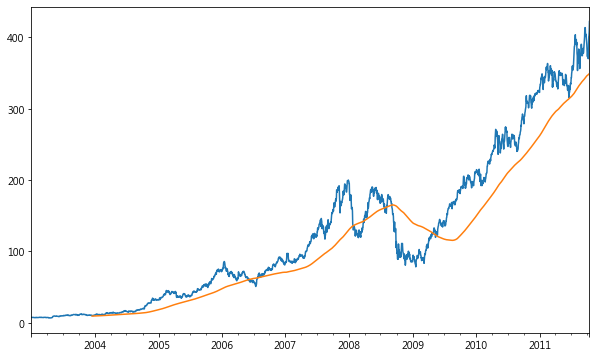

In [251]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [ ]:
# close_px.AAPL.rolling?

In [252]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [253]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[:12]

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<AxesSubplot:>

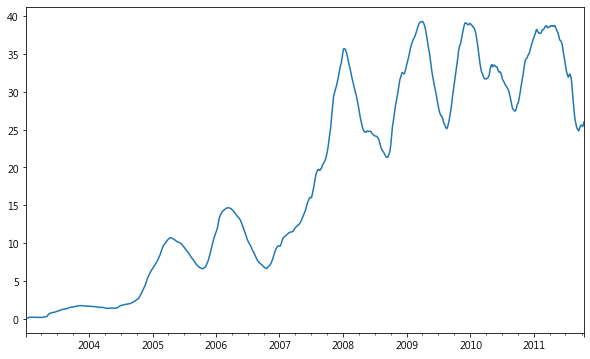

In [254]:
appl_std250.plot()

In [255]:
appl_std250.expanding?

### 指數加權移動平均（EWMA）管制圖
https://qi.cch.org.tw/zh-tw/zb/ewma/how-to-draw-ewma-control-charts
https://tedboy.github.io/pandas/computation/computation5.html

In [256]:
# 查 expanding
expanding_mean = appl_std250.expanding().mean()
expanding_mean[:20]

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.076128
2003-01-17    0.088208
2003-01-20    0.099159
2003-01-21    0.109184
2003-01-22    0.119155
2003-01-23    0.126241
2003-01-24    0.133478
2003-01-27    0.138930
2003-01-28    0.142849
2003-01-29    0.146396
Freq: B, Name: AAPL, dtype: float64

In [257]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

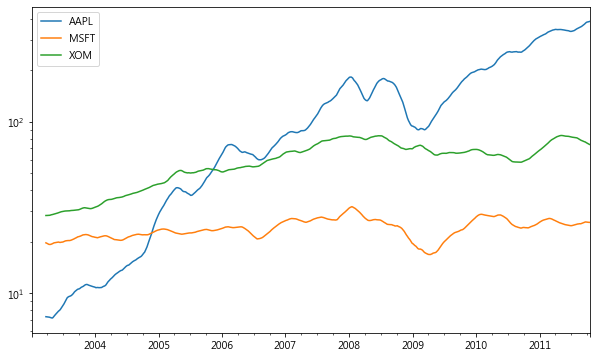

In [258]:
# 季線
close_px.rolling(60).mean().plot(logy=True)

In [259]:
# 月線
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


In [260]:
plt.close()

In [261]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

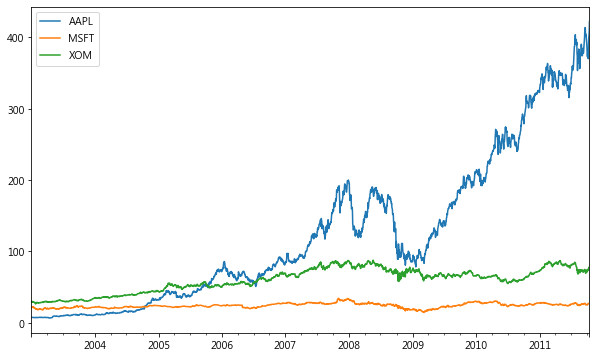

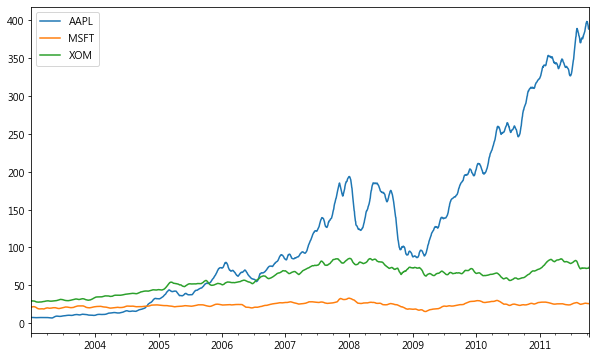

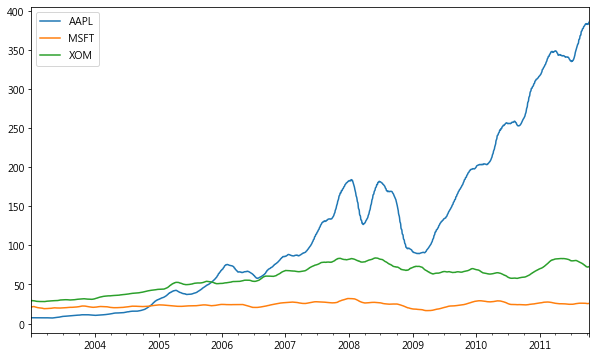

In [262]:
close_px.plot()
close_px.rolling('20D').mean().plot()
close_px.rolling('60D').mean().plot()

In [ ]:
# plt.rc('figure', figsize=(10, 6)) # runtime configuration
# fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
# ax.plot(close_px, 'b', label='one')
# ax.plot(close_px.rolling('20D').mean(), 'g--', label='two')
# ax.plot(close_px.rolling('60D').mean(), 'r.', label='three')

### §11.7.1 Exponentially Weighted Functions

### 指數加權移動平均（EWMA）管制圖
https://qi.cch.org.tw/zh-tw/zb/ewma/how-to-draw-ewma-control-charts
https://tedboy.github.io/pandas/computation/computation5.html

https://www.virtuemind.net/blog/20210716

https://www.investopedia.com/articles/07/ewma.asp

### Volatility: Exponentially weighted moving average, EWMA (FRM T2-22)
https://www.youtube.com/watch?v=ffDLG7Vt6JE
### Comparing volatility approaches: MA versus EWMA versus GARCH (FRM T2-25)
https://www.youtube.com/watch?v=d8MBpc3ST10

In [263]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [264]:
aapl_px = close_px.AAPL['2006':'2007']
aapl_px

2006-01-02     71.89
2006-01-03     74.75
2006-01-04     74.97
2006-01-05     74.38
2006-01-06     76.30
               ...  
2007-12-25    198.80
2007-12-26    198.95
2007-12-27    198.57
2007-12-28    199.83
2007-12-31    198.08
Freq: B, Name: AAPL, Length: 521, dtype: float64

In [265]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ma60

2006-01-02           NaN
2006-01-03           NaN
2006-01-04           NaN
2006-01-05           NaN
2006-01-06           NaN
                 ...    
2007-12-25    181.520333
2007-12-26    182.615000
2007-12-27    183.757333
2007-12-28    184.872000
2007-12-31    186.009667
Freq: B, Name: AAPL, Length: 521, dtype: float64

In [266]:
# 查 ewm
ewma60 = aapl_px.ewm(span=30).mean() # ewm -> Provide exponential weighted (EW) functions.
ewma60

2006-01-02     71.890000
2006-01-03     73.367667
2006-01-04     73.937767
2006-01-05     74.059619
2006-01-06     74.569360
                 ...    
2007-12-25    184.441771
2007-12-26    185.377786
2007-12-27    186.228897
2007-12-28    187.106387
2007-12-31    187.814362
Freq: B, Name: AAPL, Length: 521, dtype: float64

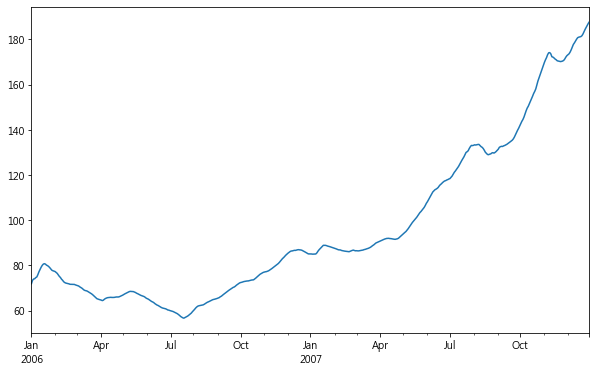

In [267]:
ewma60 = aapl_px.ewm(span=30).mean().plot()

In [268]:
df = pd.DataFrame({'B': [0, 1, 2, 3, 4]})
df

,B
0,0
1,1
2,2
3,3
4,4


In [269]:
df.ewm(span=30).mean()

,B
0,0.000000
1,0.516667
2,1.044428
3,1.583259
4,2.133126


In [ ]:
df.ewm?

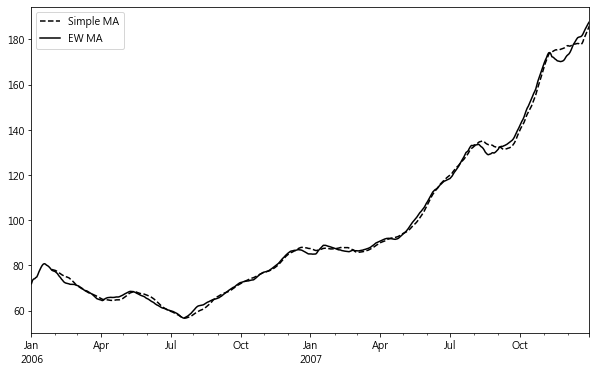

In [270]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### §11.7.2 Binary Moving Window Functions

In [271]:
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [272]:
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


In [273]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [274]:
spx_px = close_px_all['SPX']
spx_px

2003-01-02     909.03
2003-01-03     908.59
2003-01-06     929.01
2003-01-07     922.93
2003-01-08     909.93
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 2214, dtype: float64

In [275]:
spx_rets = spx_px.pct_change() #Percentage change between the current and a prior element.
spx_rets

2003-01-02         NaN
2003-01-03   -0.000484
2003-01-06    0.022474
2003-01-07   -0.006545
2003-01-08   -0.014086
                ...   
2011-10-10    0.034125
2011-10-11    0.000544
2011-10-12    0.009795
2011-10-13   -0.002974
2011-10-14    0.017380
Name: SPX, Length: 2214, dtype: float64

In [276]:
returns = close_px.pct_change()
returns

,AAPL,MSFT,XOM
2003-01-02,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684
2003-01-06,0.000000,0.017975,0.024624
2003-01-07,-0.002685,0.019052,-0.033712
2003-01-08,-0.020188,-0.028272,-0.004145
...,...,...,...
2011-10-10,0.051406,0.026286,0.036977
2011-10-11,0.029526,0.002227,-0.000131
2011-10-12,0.004747,-0.001481,0.011669
2011-10-13,0.015515,0.008160,-0.010238


In [277]:
returns.AAPL.rolling(125, min_periods=100).corr(spx_rets) # corr ->　Compute pairwise correlation of columns

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
                ...   
2011-10-10    0.736464
2011-10-11    0.729906
2011-10-12    0.728404
2011-10-13    0.727165
2011-10-14    0.729858
Length: 2292, dtype: float64

<AxesSubplot:>

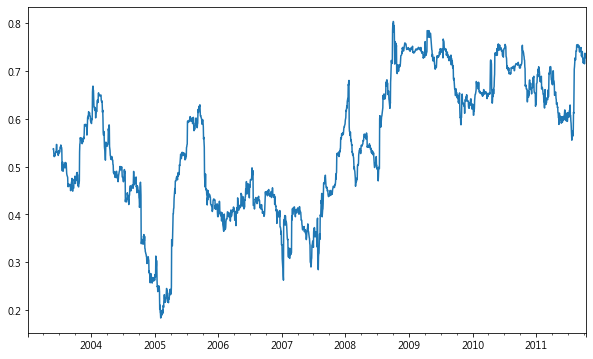

In [278]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [279]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

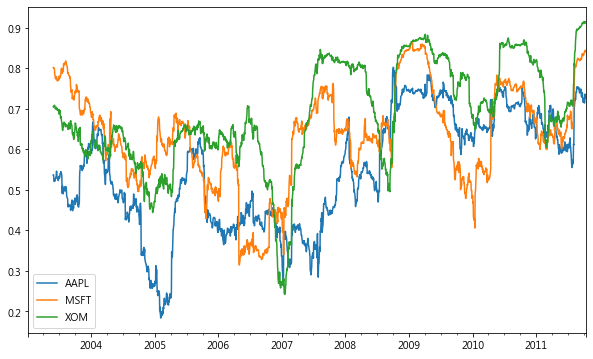

In [280]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### §11.7.3 User-Defined Moving Window Functions

In [281]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

### Compute the percentile rank of a score relative to a list of scores.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

In [282]:
# Compute the percentile rank of a score relative to a list of scores
from scipy.stats import percentileofscore 

In [283]:
percentileofscore([1, 2, 3, 4], 3)

75.0

In [284]:
returns.AAPL.rolling(250)

Rolling [window=250,center=False,axis=0,method=single]

<AxesSubplot:>

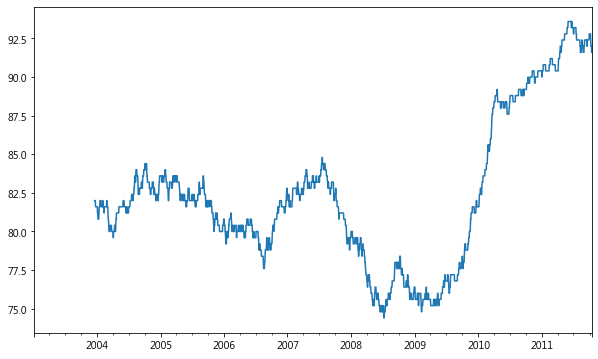

In [285]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)
# returns.AAPL.rolling(250).mean().plot()
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

<AxesSubplot:>

C:\Users\Public\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Public\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


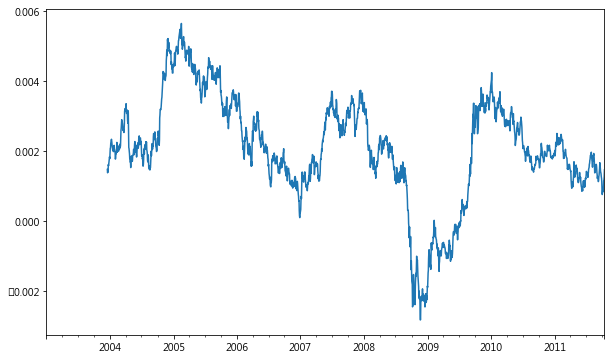

In [286]:
returns.AAPL.rolling(250).mean().plot()

In [ ]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion

## How To Resample and Interpolate Your Time Series Data With Python
https://machinelearningmastery.com/resample-interpolate-time-series-data-python/

## Mastering Time Series Analysis in Python

### Tools for Time Series Analysis and Forecasting in Python
https://towardsdatascience.com/mastering-time-series-analysis-in-python-8219047a0351


## The Complete Guide to Time Series Analysis and Forecasting
### Understand moving average, exponential smoothing, stationarity, autocorrelation, SARIMA, and apply these techniques in two projects.
https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775

## Work with Dates and Times in Python: The Calendar Module
You are naturally capable of being 10x times more productive
https://python.plainenglish.io/work-with-dates-and-times-in-python-the-calendar-module-823ae41b0dc9

## How To Resample and Interpolate Your Time Series Data With Python
https://machinelearningmastery.com/resample-interpolate-time-series-data-python/

### Is there a way in Python to mark the Chinese Holidays in Pandas Time Series
https://stackoverflow.com/questions/61179756/is-there-a-way-in-python-to-mark-the-chinese-holidays-in-pandas-time-series

In [ ]:
!pip install LunarCalendar

In [74]:
import datetime
from lunarcalendar import Converter, Solar, Lunar, DateNotExist

for year in range(2010, 2035):
    l = Lunar(year=year, month=1, day=1, isleap=False)
    print(Converter.Lunar2Solar(l))

Solar(year=2010, month=2, day=14)
Solar(year=2011, month=2, day=3)
Solar(year=2012, month=1, day=23)
Solar(year=2013, month=2, day=10)
Solar(year=2014, month=1, day=31)
Solar(year=2015, month=2, day=19)
Solar(year=2016, month=2, day=8)
Solar(year=2017, month=1, day=28)
Solar(year=2018, month=2, day=16)
Solar(year=2019, month=2, day=5)
Solar(year=2020, month=1, day=25)
Solar(year=2021, month=2, day=12)
Solar(year=2022, month=2, day=1)
Solar(year=2023, month=1, day=22)
Solar(year=2024, month=2, day=10)
Solar(year=2025, month=1, day=29)
Solar(year=2026, month=2, day=17)
Solar(year=2027, month=2, day=6)
Solar(year=2028, month=1, day=26)
Solar(year=2029, month=2, day=13)
Solar(year=2030, month=2, day=3)
Solar(year=2031, month=1, day=23)
Solar(year=2032, month=2, day=11)
Solar(year=2033, month=1, day=31)
Solar(year=2034, month=2, day=19)


In [ ]:
# Lunar?